# GBM CCN1

Dileep D. Monie

---

Notebook to support “Modular network mechanism of CCN1-associated resistance to HSV-1-derived oncolytic immunovirotherapies for glioblastomas” manuscript.

In [1]:
from __future__ import print_function
from platform import python_version

import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns

# for Notebook
%matplotlib inline

print(python_version())
print('Last Updated On: ', dt.datetime.now())

3.7.10
Last Updated On:  2021-04-21 16:07:27.856970


In [2]:
# define color schemes
# NetDecoder
warm = '#f9a635'
cool = '#1c9099'

# https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
accent1 = '#7fc97f'
accent2 = '#beaed4'
accent3 = '#fdc086'
accent4 = '#ffff99'
accent5 = '#386cb0'

In [3]:
# define lists of nodes (GARS = GARS1)
nodes =   ['AHSA1','CASP3','CCL5','CFTR','COPS5','CUL3','DCP2','DDX58','FN1',
           'GARS1','GTPBP1','HLA-E','HNRNPA1','HSP90AA1','HUWE1','IFIT1',
           'IFIT3','IKBKE','IL32','IMPDH2','IRF7','LYN','MCM3','MCM7','NCL',
           'P4HA1','PAN2','PF4','PIGR','PLAT','POLR2H','PRKAR1A','PRKCB','RPA3',
           'RPL6','SERPINA5','SKIL','SMAD4','SMAD6','SPTBN1','STAT1','STAT2',
           'STIP1','SUMO1','THBD','TUT1','UBC','XRN2','YBX1','ZC3HAV1']

sources = ['CCL5','DDX58','GTPBP1','HLA-E','IFIT1','IFIT3','IL32','IRF7',
           'STAT1','STAT2','ZC3HAV1']

routers = ['AHSA1','CASP3','CFTR','COPS5','CUL3','DCP2','FN1','GARS1',
           'HNRNPA1','HSP90AA1','HUWE1','IKBKE','IMPDH2','LYN','MCM3','MCM7',
           'NCL','P4HA1','PF4','PIGR','PLAT','POLR2H','PRKAR1A','PRKCB','RPA3',
           'SERPINA5','SKIL','SMAD4','SMAD6','SPTBN1','STIP1','THBD','TUT1',
           'UBC']

targets = ['PAN2','RPL6','SUMO1','XRN2','YBX1']

## DepMap violin plots

Download data from https://depmap.org/portal/download/custom/ using these parameters:
* DATASETS: Gene
  * CRISPR (Avana) Public 20Q4
  * Combined RNAi (Broad, Novartis, Marcotte)
* CELL LINES: Central Nervous System > Glioma > Glioblastoma
>>
ACH-000283,ACH-000558,ACH-000269,ACH-001329,ACH-000464,ACH-002223,ACH-002224,ACH-002225,ACH-002226,ACH-002227,ACH-002228,ACH-002229,ACH-002230,ACH-002231,ACH-000863,ACH-000244,ACH-000098,ACH-000738,ACH-000756,ACH-000102,ACH-000027,ACH-000231,ACH-000622,ACH-000445,ACH-000479,ACH-002259,ACH-000819,ACH-000328,ACH-000595,ACH-000634,ACH-000215,ACH-002268,ACH-000455,ACH-000673,ACH-000676,ACH-000760,ACH-000152,ACH-000200,ACH-001605,ACH-001606,ACH-001608,ACH-001609,ACH-001610,ACH-001611,ACH-001622,ACH-001623,ACH-001624,ACH-000887,ACH-000376,ACH-001198,ACH-000368,ACH-000623,ACH-000289,ACH-000543,ACH-000370,ACH-000571,ACH-000208,ACH-000036,ACH-000469,ACH-000570
* GENES/COMPOUNDS (note: GARS = GARS1)
>>
AHSA1 CASP3 CCL5 CFTR COPS5 CUL3 DCP2 DDX58 FN1 GARS1 GTPBP1 HLA-E HNRNPA1 HSP90AA1 HUWE1 IFIT1 IFIT3 IKBKE IL32 IMPDH2 IRF7 LYN MCM3 MCM7 NCL P4HA1 PAN2 PF4 PIGR PLAT POLR2H PRKAR1A PRKCB RPA3 RPL6 SERPINA5 SKIL SMAD4 SMAD6 SPTBN1 STAT1 STAT2 STIP1 SUMO1 THBD TUT1 UBC XRN2 YBX1 ZC3HAV1 CCN1
* Download File options
  * Add cell line metadata to download


In [ ]:
# upload DepMap GBM CSV files
from google.colab import files
uploaded = files.upload()

Saving depmap_gbm.zip to depmap_gbm.zip


In [ ]:
!unzip depmap_gbm.zip

Archive:  depmap_gbm.zip
  inflating: Combined_RNAi_(Broad,_Novartis,_Marcotte)_subsetted.csv  
  inflating: CRISPR_(Avana)_Public_20Q4_subsetted.csv  


In [ ]:
# make DEMETER2 dataframe from CSV file
demeter2 = pd.read_csv('Combined_RNAi_(Broad,_Novartis,_Marcotte)_subsetted.csv',
                       sep=',')
demeter2.index = demeter2['cell_line_display_name']
demeter2 = demeter2.drop(['depmap_id', 'cell_line_display_name',	'lineage_1',
                          'lineage_2',	'lineage_3', 'lineage_4'], axis=1)
demeter2 = demeter2.dropna(axis=1, how='all') # drop genes without data

# sort genes by median values
d2_sorted = demeter2.median().sort_values(ascending=False).index
demeter2 = demeter2.reindex(d2_sorted, axis=1)

demeter2.head()

,IFIT1,TUT1,AHSA1,PF4,P4HA1,IFIT3,CASP3,IRF7,STAT1,LYN,SPTBN1,SKIL,PRKCB,CCN1,FN1,ZC3HAV1,HLA-E,SMAD4,IKBKE,CFTR,SUMO1,DDX58,STAT2,PIGR,THBD,DCP2,IMPDH2,GARS1,PLAT,MCM3,CCL5,GTPBP1,SMAD6,PAN2,HSP90AA1,CUL3,XRN2,YBX1,SERPINA5,HNRNPA1,IL32,PRKAR1A,HUWE1,POLR2H,UBC,RPA3,MCM7,NCL,COPS5,RPL6
cell_line_display_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1207,NaN,NaN,NaN,0.154927,0.094002,0.058641,0.315829,0.034481,-0.308585,0.053384,NaN,-0.366619,0.075403,NaN,-0.205039,-0.014826,0.422505,-0.170207,0.026021,-0.343665,NaN,NaN,-0.395059,-0.139554,0.034579,-0.405488,0.196866,0.030724,-0.548488,-0.534704,-0.190149,-0.358846,-0.671213,-0.336643,-0.194518,-0.249235,-0.625859,-0.165627,-0.251084,-0.351794,-0.294506,0.334405,-0.123944,-0.674187,-0.561995,-0.271073,-0.312210,-0.716922,-0.849352,-1.164213
A172,NaN,NaN,NaN,-0.179130,-0.029829,-0.250591,-0.008627,0.074441,-0.104508,0.032159,NaN,0.021937,-0.052814,-0.013328,0.106487,-0.083343,-0.160485,-0.347563,0.030832,-0.016289,-0.344587,-0.234725,-0.059427,-0.177240,-0.099404,-0.222173,0.057766,-0.143355,-0.148862,-0.153992,-0.366879,-0.276306,0.186915,-0.293355,-0.339483,0.093786,-0.474236,-0.342489,-0.241595,-0.107302,-0.038235,-0.764851,-0.574027,-0.667129,-0.297928,-0.586050,-1.003106,-1.554954,-0.858602,-1.177003
AM38,NaN,NaN,NaN,0.179168,0.081678,0.053025,0.133132,-0.018746,-0.225727,0.015415,NaN,-0.129096,0.063127,NaN,0.213513,0.020610,0.015387,0.159587,-0.008965,0.069692,NaN,NaN,-0.158001,0.006648,-0.069390,0.014203,-0.189620,-0.157407,-0.224158,-0.410563,0.035337,-0.059532,-0.104453,-0.013085,-0.215619,-0.268065,-0.278911,-0.020951,-0.368904,-0.273210,-0.346361,0.376216,-0.507431,-0.432868,-0.635937,-0.872768,-0.721637,-0.493289,-0.882870,-1.073728
ANGMCSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAS1,NaN,NaN,NaN,-0.131653,-0.054665,0.150857,-0.306722,0.174529,-0.150828,0.145463,NaN,0.082876,0.184492,0.053651,0.033012,-0.110081,0.174737,0.001549,-0.153038,-0.180650,-0.236280,0.102637,-0.173305,0.155510,-0.170358,-0.160090,-0.574950,0.374164,-0.159435,-0.343386,-0.067618,-0.169946,-0.239733,0.087169,-0.576721,-0.396768,-0.246519,-0.849739,-0.555653,-0.376178,-0.467039,-0.283373,-0.364544,-0.707272,-1.513724,-0.682350,-1.009712,-0.546616,-0.757359,-1.308616


In [ ]:
# make Avana dataframe from CSV file
avana = pd.read_csv("CRISPR_(Avana)_Public_20Q4_subsetted.csv", sep=",")
avana.index = avana['cell_line_display_name']
avana = avana.drop(['depmap_id', 'cell_line_display_name',	'lineage_1',
                    'lineage_2',	'lineage_3', 'lineage_4'], axis=1)
avana = avana.dropna(axis=1, how='all') # drop genes without data

# sort genes by median values
avana_sorted = avana.median().sort_values(ascending=False).index
avana = avana.reindex(avana_sorted, axis=1)

avana.head()

,IL32,STAT1,PIGR,LYN,IFIT3,SKIL,P4HA1,CFTR,CASP3,PRKCB,SPTBN1,CCN1,PLAT,FN1,SMAD4,DCP2,IKBKE,DDX58,IRF7,IFIT1,THBD,SERPINA5,ZC3HAV1,AHSA1,HSP90AA1,STAT2,HNRNPA1,SUMO1,CCL5,STIP1,HLA-E,GTPBP1,SMAD6,PF4,PAN2,IMPDH2,PRKAR1A,CUL3,MCM3,NCL,YBX1,POLR2H,RPL6,GARS1,UBC,HUWE1,RPA3,TUT1,XRN2,MCM7,COPS5
cell_line_display_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANGMCSS,0.075193,0.139231,0.141896,0.090872,0.020141,0.118656,0.083800,0.050747,0.045469,-0.063713,-0.007408,0.079571,-0.101469,0.036265,0.037951,0.146396,-0.037361,-0.063708,-0.062608,-0.060292,-0.122292,-0.197494,-0.27215,-0.128863,-0.048628,-0.367233,-0.216770,-0.108883,-0.276788,0.033224,-0.289088,-0.039820,-0.272064,-0.220940,-0.393701,-0.283421,-0.721214,-0.643803,-0.801150,-1.019170,-0.830624,-1.215938,-0.795060,-1.151188,-0.712574,-1.131321,-1.098615,-1.286730,-1.068232,-1.171851,-1.429376
CAS1,0.180597,0.206135,0.348070,-0.210794,0.005212,0.033372,0.038199,-0.050415,-0.134789,0.041189,-0.109326,-0.005762,-0.315451,-0.271256,0.275964,0.058164,-0.079364,0.051295,-0.254063,-0.097873,-0.141719,-0.289283,-0.10032,-0.237934,-0.205916,-0.131139,-0.279507,-0.124170,-0.075033,-0.252640,-0.217654,0.038259,-0.324630,-0.081638,-0.330896,-0.552240,-0.579172,-1.156935,-1.115755,-0.814497,-1.263969,-0.688799,-0.769046,-1.387628,-1.614964,-1.224767,-1.305708,-1.443365,-1.314795,-1.452567,-1.676389


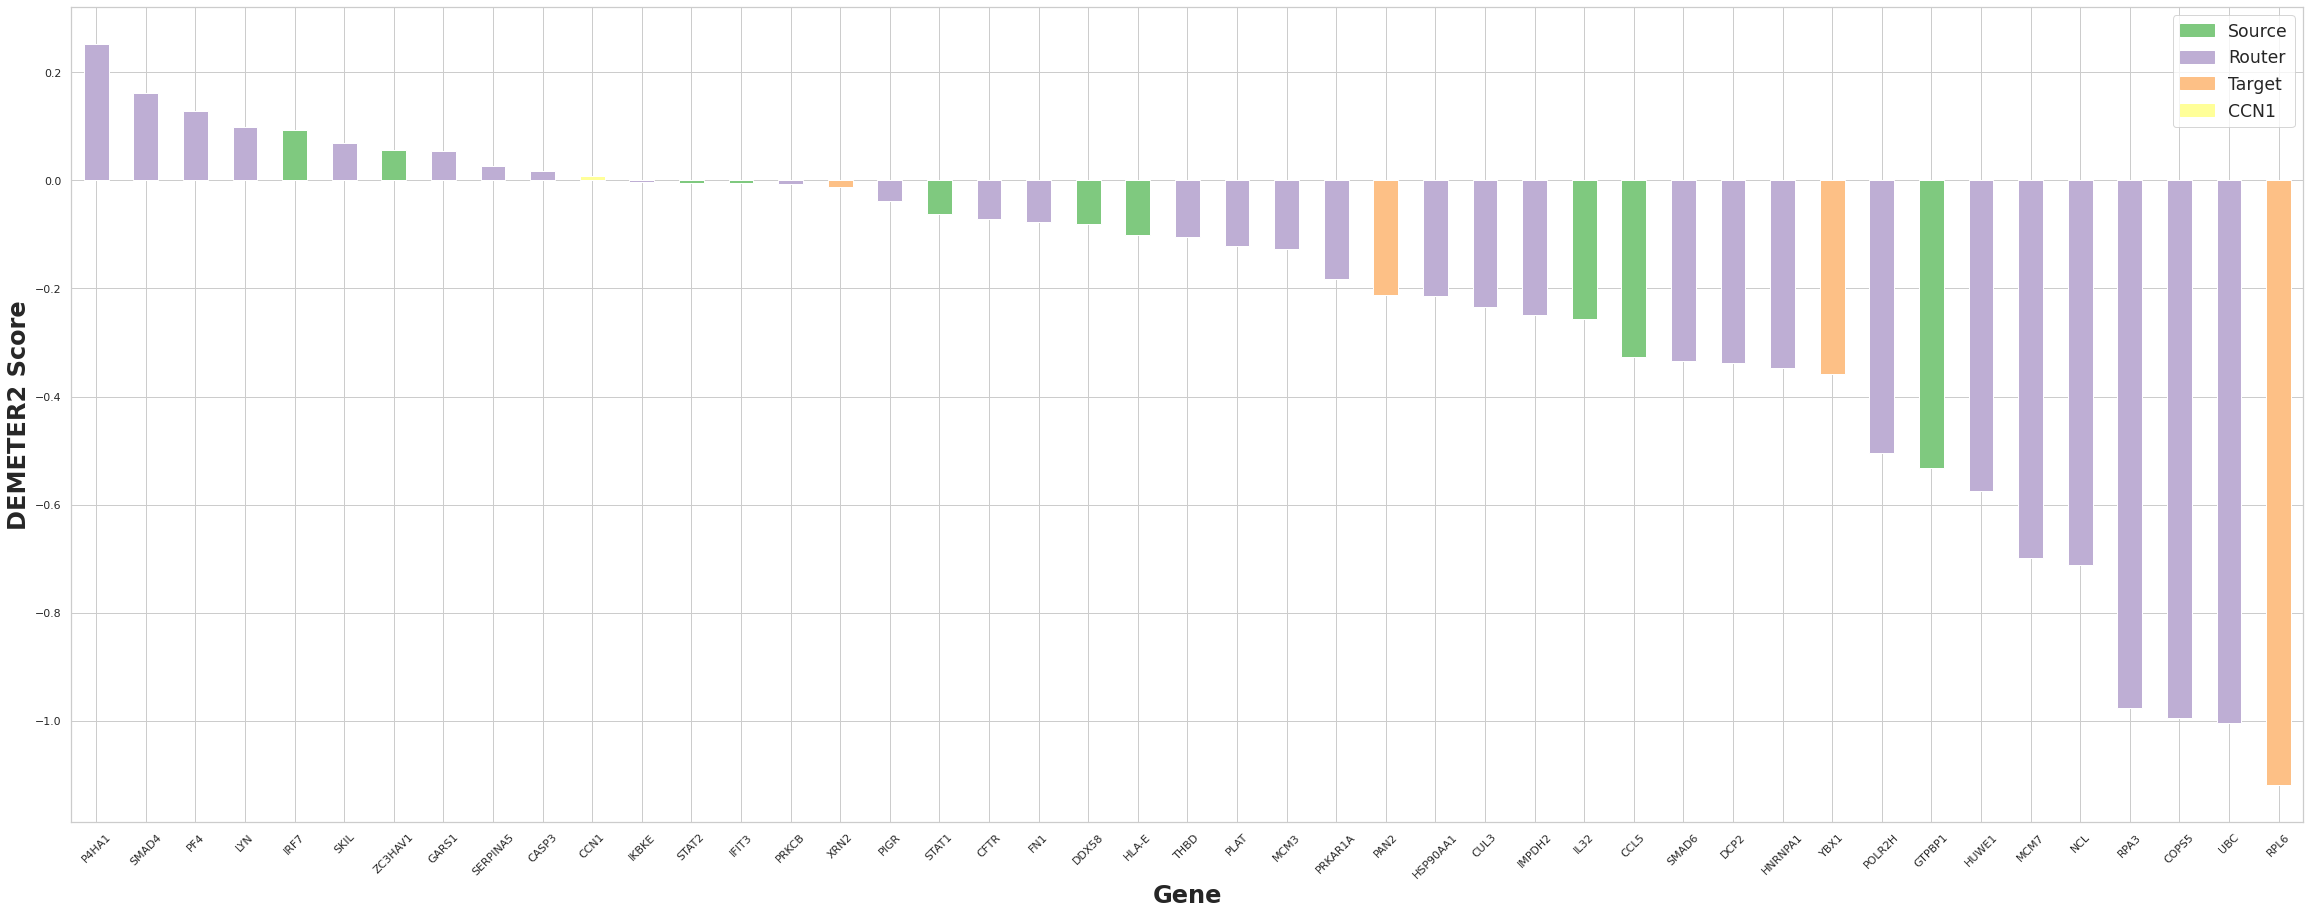

In [ ]:
# waterfall bar plot of LN229 DEMETER2 scores (not in Avana dataset)

# set seaborn plot parameters
sns.set(rc={'figure.figsize':(40,15)})
sns.set_theme(style='whitegrid')

# make LN229 cell line RNAi dataframe
ln229_d2 = demeter2.loc['LN229']
ln229_d2 = ln229_d2.dropna() # drop genes without DEMETER2 scores
ln229_d2 = ln229_d2.sort_values(ascending=False) # sort for waterfall

# generate color palette
#colors = np.where(ln229_d2<0, warm, cool) # standard
colors = [] # based on node types
for column in ln229_d2.index:
    if (column in sources):
      colors.append(accent1)
    if (column in routers):
      colors.append(accent2)
    if (column in targets):
      colors.append(accent3)
    if (column == 'CCN1'):
      colors.append(accent4)

# make plot
ax = ln229_d2.plot.bar(color=colors)

# draw horizontal line of interest
#ax.axhline(-0.5)

# label plot
#plt.title('LN229 RNAi Gene Dependencies')
plt.xlabel('Gene', fontsize=24, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('DEMETER2 Score', fontsize=24, weight='bold')

# generate legend
source_patch = mpatches.Patch(color=accent1, label='Source')
router_patch = mpatches.Patch(color=accent2, label='Router')
target_patch = mpatches.Patch(color=accent3, label='Target')
ccn1_patch = mpatches.Patch(color=accent4, label='CCN1')
plt.legend(handles=[source_patch,router_patch,target_patch,ccn1_patch],
           fontsize='x-large')

# save and show figure
plt.savefig('4A_LN229_DEMETER2.svg')
plt.show()

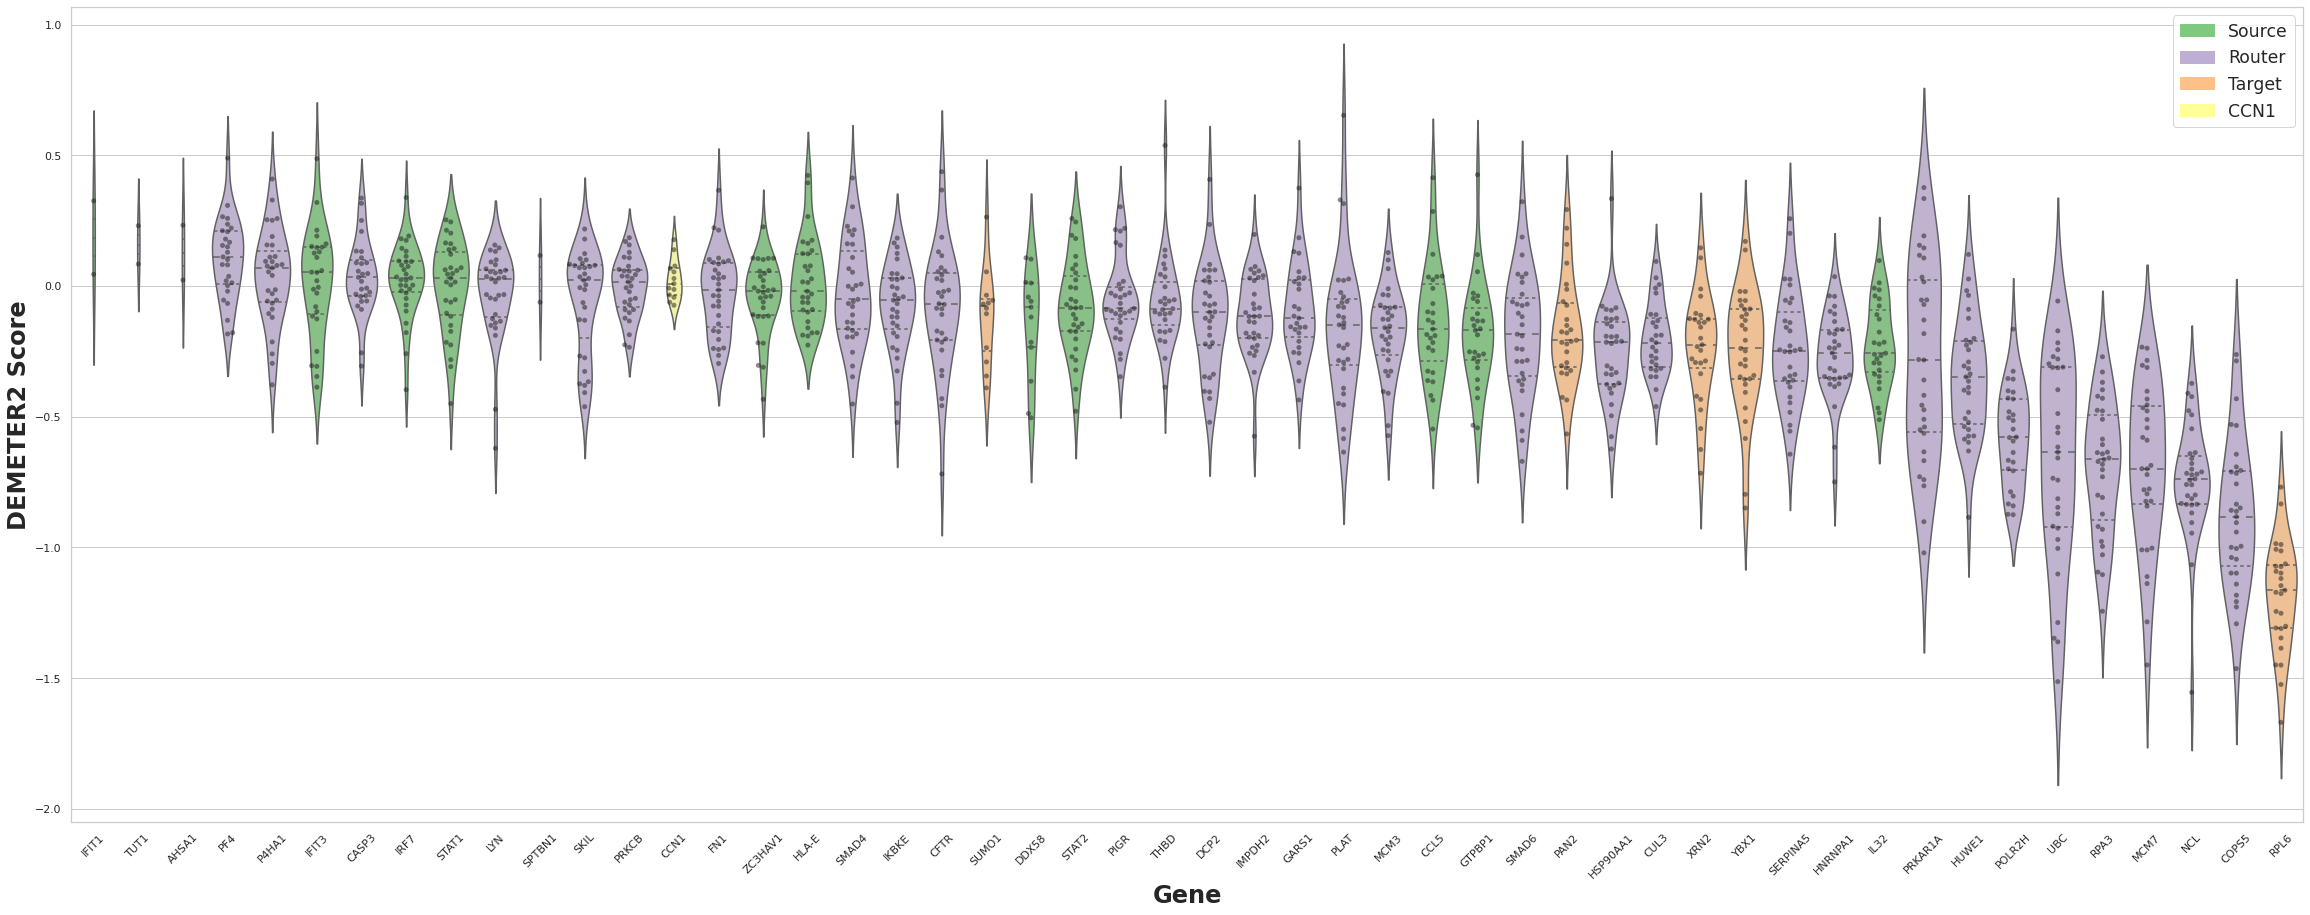

In [ ]:
# violin plot of RNAi gene dependencies

# set seaborn plot parameters
sns.set(rc={'figure.figsize':(40,15)})
sns.set_theme(style='whitegrid')

# generate color palette
#colors = np.where(demeter2.median()<-0.5, warm, cool) # based on medians
colors = [] # based on node types
for column in demeter2:
    if (column in sources):
      colors.append(accent1)
    if (column in routers):
      colors.append(accent2)
    if (column in targets):
      colors.append(accent3)
    if (column == 'CCN1'):
      colors.append(accent4)

# generate violin plot
ax = sns.violinplot(data=demeter2, palette=colors, scale='count', inner='quartile')

# overlay swarm plot
ax = sns.swarmplot(data=demeter2, color='k', alpha=0.5)

# draw horizontal line of interest
#ax.axhline(-0.5)

# label plot
#plt.title('RNAi Gene Dependencies')
plt.xlabel('Gene', fontsize=24, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('DEMETER2 Score', fontsize=24, weight='bold')

# generate legend
source_patch = mpatches.Patch(color=accent1, label='Source')
router_patch = mpatches.Patch(color=accent2, label='Router')
target_patch = mpatches.Patch(color=accent3, label='Target')
ccn1_patch = mpatches.Patch(color=accent4, label='CCN1')
plt.legend(handles=[source_patch,router_patch,target_patch,ccn1_patch],
           fontsize='x-large')

# save and show figure
plt.savefig('4B_GBM_DEMETER2.svg')
plt.show()

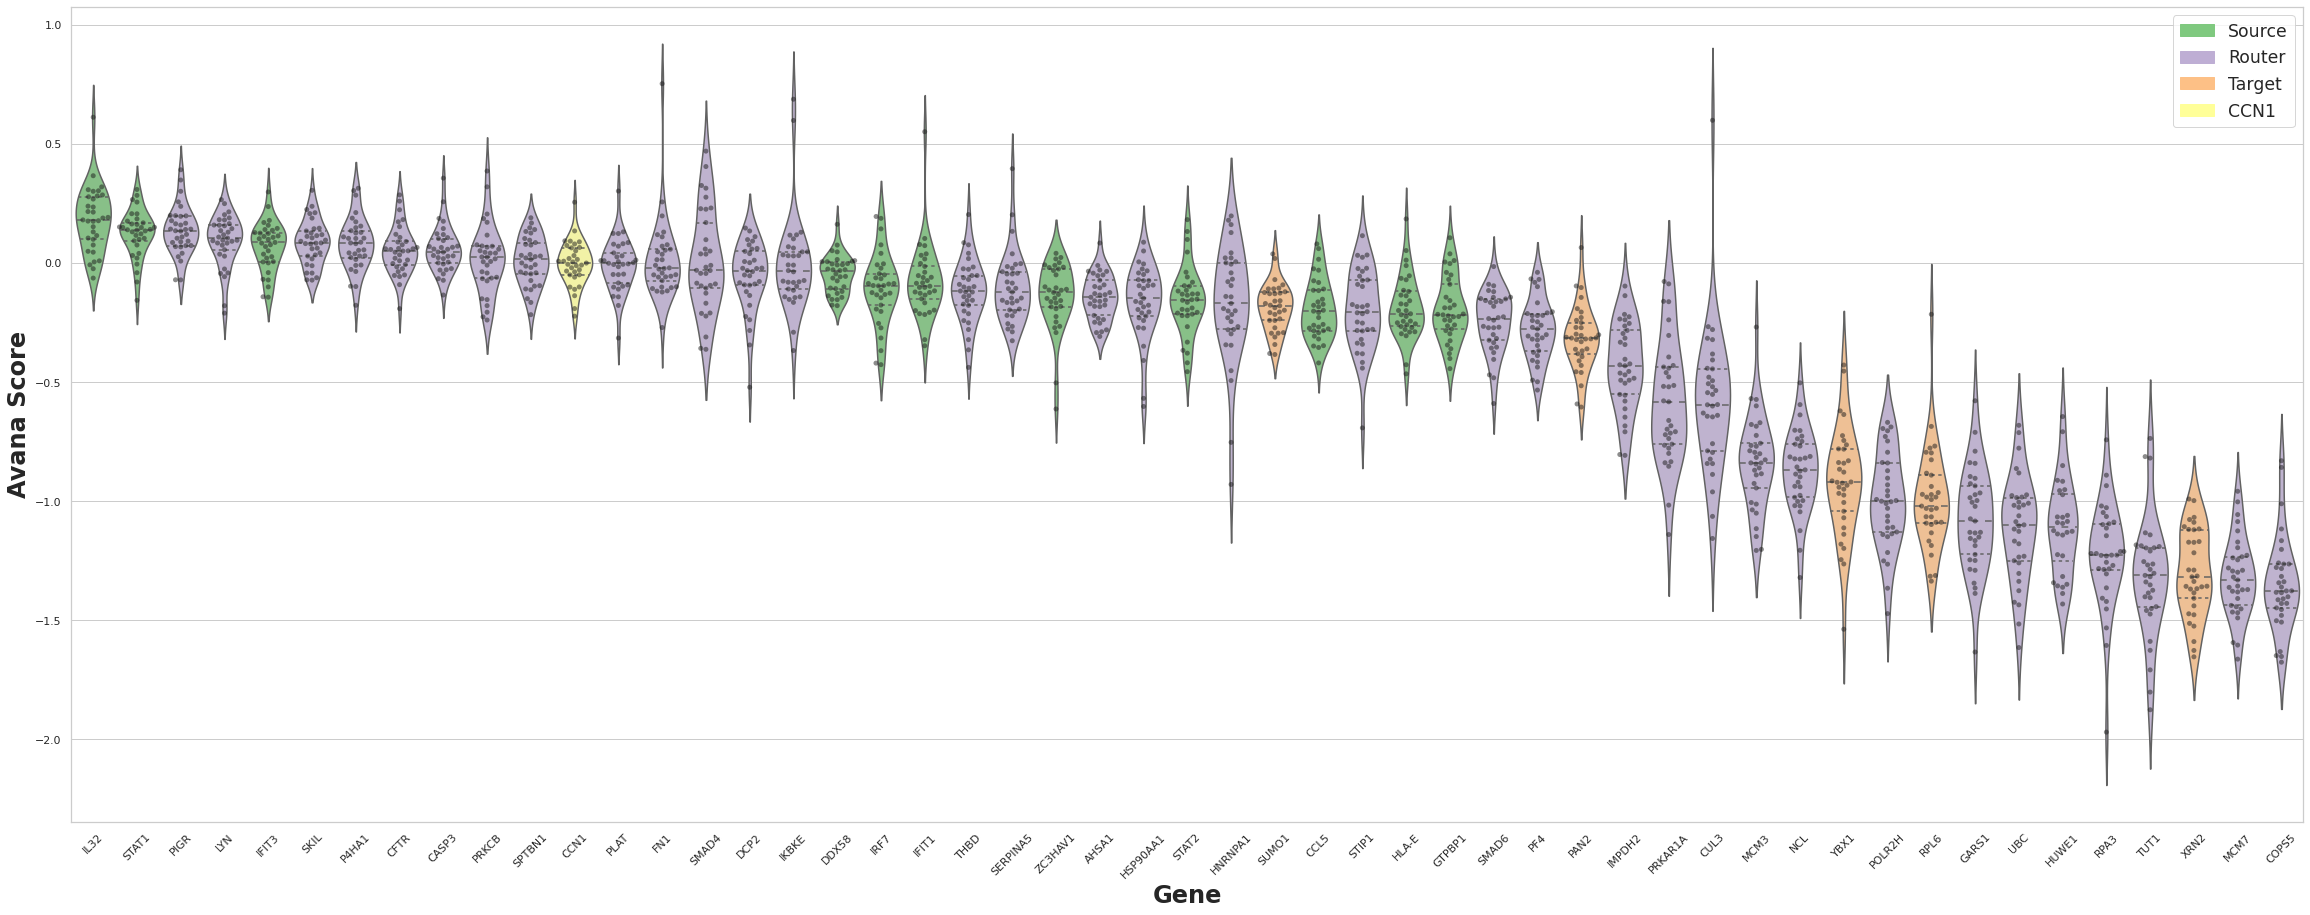

In [ ]:
# violin plot of CRISPR gene dependencies

# set seaborn plot parameters
sns.set(rc={'figure.figsize':(40,15)})
sns.set_theme(style='whitegrid')

# generate color palette
#colors = np.where(avana.median()<-0.5, warm, cool) # based on medians
colors = [] # based on node types
for column in avana:
    if (column in sources):
      colors.append(accent1)
    if (column in routers):
      colors.append(accent2)
    if (column in targets):
      colors.append(accent3)
    if (column == 'CCN1'):
      colors.append(accent4)

# generate violin plot
ax = sns.violinplot(data=avana, palette=colors, scale='count', inner='quartile')

# overlay swarm plot
ax = sns.swarmplot(data=avana, color='k', alpha=0.5)

# draw horizontal line of interest
#ax.axhline(-0.5)

# label plot
#plt.title('CRISPR Gene Dependencies')
plt.xlabel('Gene', fontsize=24, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Avana Score', fontsize=24, weight='bold')

# generate legend
source_patch = mpatches.Patch(color=accent1, label='Source')
router_patch = mpatches.Patch(color=accent2, label='Router')
target_patch = mpatches.Patch(color=accent3, label='Target')
ccn1_patch = mpatches.Patch(color=accent4, label='CCN1')
plt.legend(handles=[source_patch,router_patch,target_patch,ccn1_patch],
           fontsize='x-large')

# save and show figure
plt.savefig('4C_GBM_Avana.svg')
plt.show()

In [ ]:
# determine how many GBM cell lines have DEMETER2 data for these genes
demeter2.count()

IFIT1        2
TUT1         2
AHSA1        2
PF4         27
P4HA1       31
IFIT3       27
CASP3       27
IRF7        31
STAT1       31
LYN         31
SPTBN1       2
SKIL        31
PRKCB       31
CCN1        13
FN1         31
ZC3HAV1     31
HLA-E       31
SMAD4       31
IKBKE       31
CFTR        31
SUMO1       12
DDX58       13
STAT2       31
PIGR        31
THBD        27
DCP2        31
IMPDH2      31
GARS1       27
PLAT        31
MCM3        31
CCL5        27
GTPBP1      27
SMAD6       31
PAN2        27
HSP90AA1    31
CUL3        27
XRN2        27
YBX1        31
SERPINA5    31
HNRNPA1     31
IL32        27
PRKAR1A     31
HUWE1       31
POLR2H      27
UBC         31
RPA3        31
MCM7        31
NCL         31
COPS5       31
RPL6        27
dtype: int64

In [ ]:
# determine how many GBM cell lines have Avana data for these genes
avana.count()

IL32        33
STAT1       33
PIGR        33
LYN         33
IFIT3       33
SKIL        33
P4HA1       33
CFTR        33
CASP3       33
PRKCB       33
SPTBN1      33
CCN1        33
PLAT        33
FN1         33
SMAD4       33
DCP2        33
IKBKE       33
DDX58       33
IRF7        33
IFIT1       33
THBD        33
SERPINA5    33
ZC3HAV1     33
AHSA1       33
HSP90AA1    33
STAT2       33
HNRNPA1     33
SUMO1       33
CCL5        33
STIP1       33
HLA-E       33
GTPBP1      33
SMAD6       33
PF4         33
PAN2        33
IMPDH2      33
PRKAR1A     33
CUL3        33
MCM3        33
NCL         33
YBX1        33
POLR2H      33
RPL6        33
GARS1       33
UBC         33
HUWE1       28
RPA3        33
TUT1        33
XRN2        33
MCM7        33
COPS5       33
dtype: int64

## WebGestalt

### Subnetwork (mSBW abstract)

In [ ]:
# upload WebGestalt enrichment results text file
from google.colab import files
uploaded = files.upload()

Saving enrichment_results_wg_result1608328621.txt to enrichment_results_wg_result1608328621.txt


In [ ]:
# make dataframe from WebGestalt enrichment results
webgestalt = pd.read_csv('enrichment_results_wg_result1608328621.txt',
                         sep='\t', header=0) # tab seperated values
webgestalt['-log10FDR'] = -np.log10(webgestalt['FDR'])
webgestalt = webgestalt.sort_values(by=['enrichmentRatio'],
                                    ascending=True) # sort by enrichmentRatio
webgestalt

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId,-log10FDR
9,hsa04062,Chemokine signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,189,6,1.091734,5.495843,6.855632e-04,0.022349,4067;5196;5579;6352;6772;6773,STAT1;LYN;CCL5;PF4;STAT2;PRKCB,1.650735
8,hsa04621,NOD-like receptor signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,168,6,0.970430,6.182823,3.661858e-04,0.013264,3320;3665;6352;6772;6773;9641,STAT1;CCL5;IRF7;HSP90AA1;IKBKE;STAT2,1.877323
6,hsa05167,Kaposi sarcoma-associated herpesvirus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,186,7,1.074405,6.515233,8.093781e-05,0.003769,3133;3665;4067;6772;6773;836;9641,STAT1;LYN;CASP3;IRF7;HLA-E;IKBKE;STAT2,2.423729
2,hsa05169,Epstein-Barr virus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,201,8,1.161051,6.890310,1.560960e-05,0.001574,23586;3133;3665;4067;6772;6773;836;9641,STAT1;LYN;CASP3;IRF7;HLA-E;DDX58;IKBKE;STAT2,2.803084
5,hsa05164,Influenza A,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,171,7,0.987760,7.086745,4.741106e-05,0.002576,23586;3665;5579;6352;6772;6773;9641,STAT1;CCL5;IRF7;DDX58;IKBKE;STAT2;PRKCB,2.589054
7,hsa05160,Hepatitis C,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,131,6,0.756705,7.929117,9.394453e-05,0.003828,23586;3434;3665;6772;6773;9641,STAT1;IRF7;DDX58;IKBKE;STAT2;IFIT1,2.417001
0,hsa05168,Herpes simplex infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,185,9,1.068629,8.422008,7.947629e-07,0.000212,23586;3133;3434;3665;6352;6772;6773;836;9641,STAT1;CCL5;CASP3;IRF7;HLA-E;DDX58;IKBKE;STAT2;...,3.673399
1,hsa05161,Hepatitis B,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,144,8,0.831798,9.617725,1.301409e-06,0.000212,23586;3665;4089;5579;6772;6773;836;9641,STAT1;CASP3;IRF7;SMAD4;DDX58;IKBKE;STAT2;PRKCB,3.673399
3,hsa04933,AGE-RAGE signaling pathway in diabetic complic...,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,99,6,0.571861,10.492063,1.930893e-05,0.001574,2335;4089;5579;6772;7056;836,STAT1;FN1;THBD;CASP3;SMAD4;PRKCB,2.803084
4,hsa04623,Cytosolic DNA-sensing pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,63,5,0.363911,13.739607,2.762837e-05,0.001801,23586;3665;5437;6352;9641,CCL5;IRF7;POLR2H;DDX58;IKBKE,2.744397


In [ ]:
# retrieve genes enriched for "herpes simplex infection"
webgestalt['userId'][0]

'STAT1;CCL5;CASP3;IRF7;HLA-E;DDX58;IKBKE;STAT2;IFIT1'

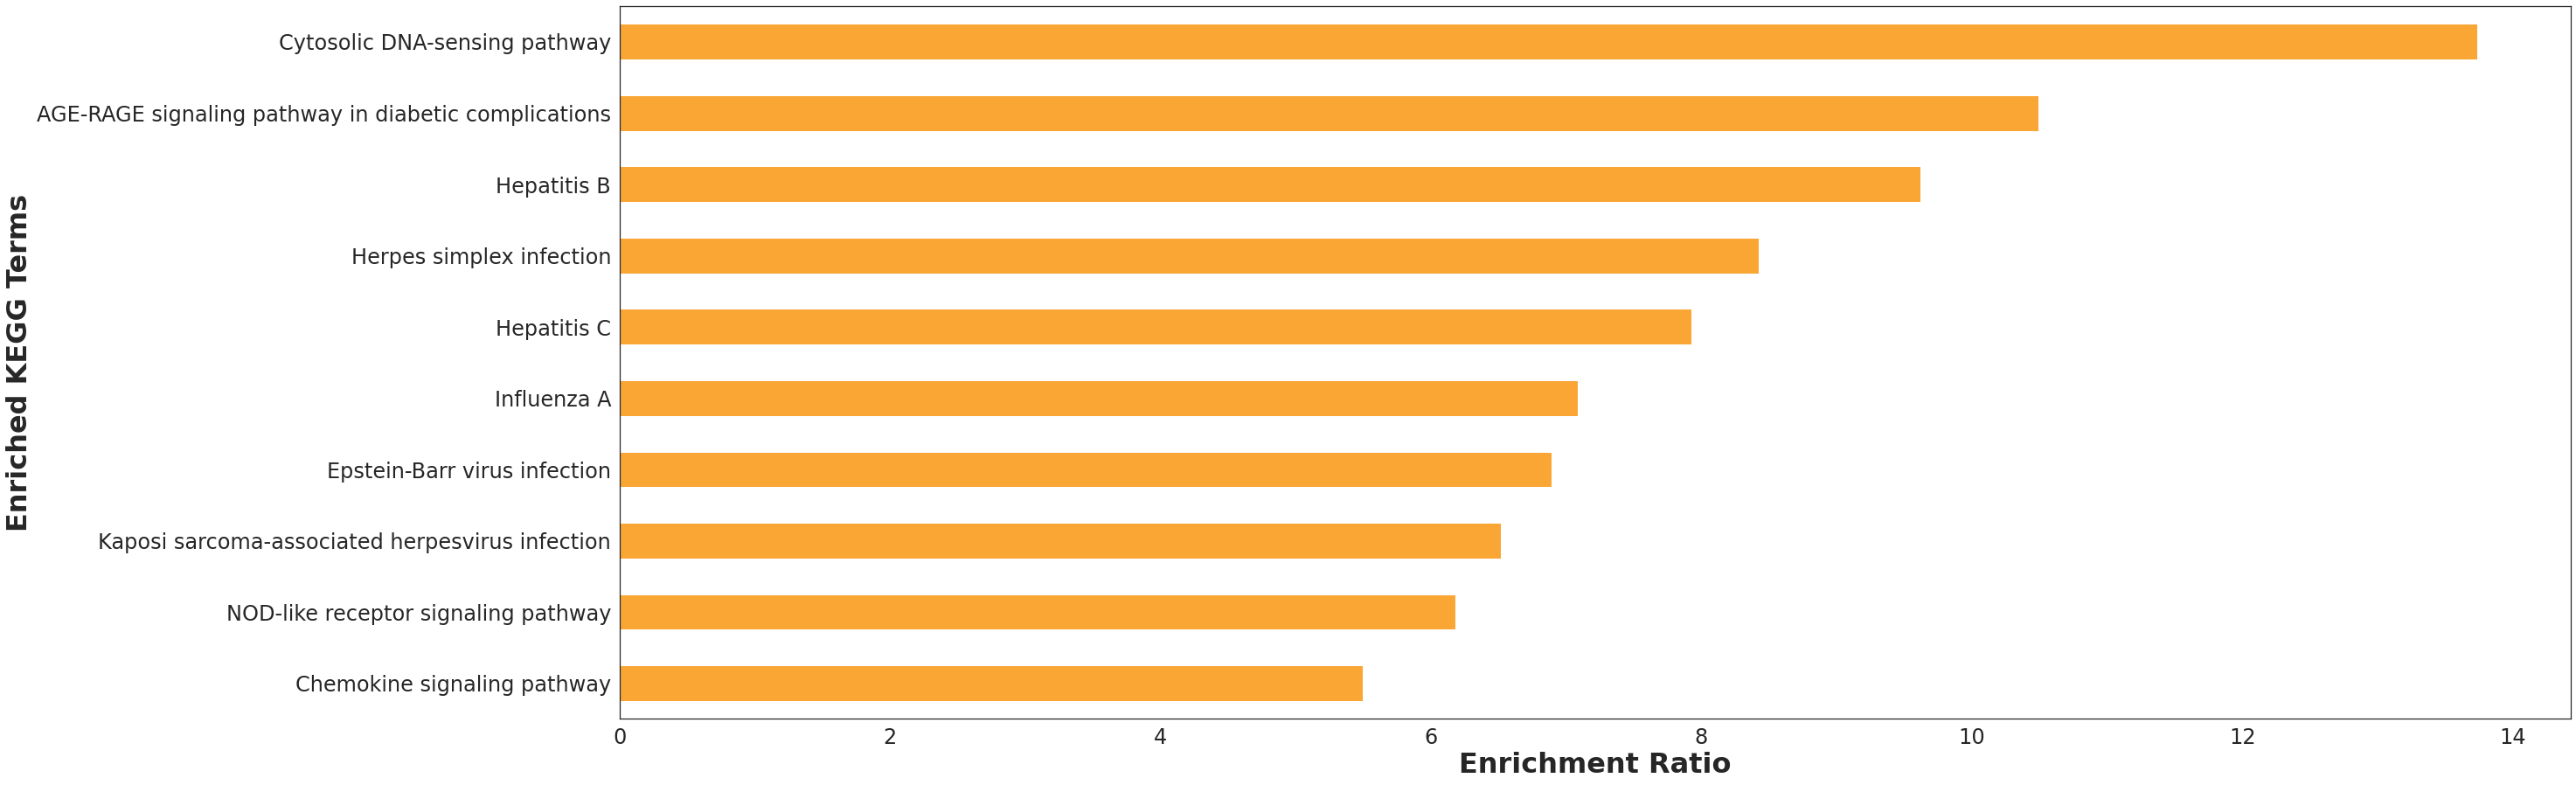

In [ ]:
# plot WebGestalt enrichment results

# set seaborn plot parameters
sns.set_theme(style='white')

# make horizontal bar plot
ax = webgestalt.plot.barh(x='description', y='enrichmentRatio', fontsize=24,
                          figsize=(40,15), legend=False, color=warm)

# label axes
ax.set_xlabel('Enrichment Ratio', fontsize=32, weight='bold')
ax.set_ylabel('Enriched KEGG Terms', fontsize=32, weight='bold')

# save and show figure
plt.savefig('2A_ORA_KEGG_Network.svg')
plt.show()

### Edges (AACR abstract)

In [ ]:
# upload WebGestalt enrichment results text file
from google.colab import files
uploaded = files.upload()

Saving enrichment_results_wg_result1605821970.txt to enrichment_results_wg_result1605821970.txt


In [ ]:
# make dataframe from WebGestalt enrichment results
wg_edges = pd.read_csv('enrichment_results_wg_result1605821970.txt',
                         sep='\t', header=0) # tab seperated values
wg_edges['-log10FDR'] = -np.log10(wg_edges['FDR'])
wg_edges = wg_edges.sort_values(by=['enrichmentRatio'],
                                ascending=True) # sort by enrichmentRatio
wg_edges

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId,-log10FDR
3,GO:0006955,immune response,http://amigo.geneontology.org/amigo/term/GO:00...,1919,16,2.418327,6.616144,1.042799e-11,2.370022e-08,60;2833;3383;3429;3551;5295;6373;6772;6777;731...,PIK3R1;LAT;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;NLR...,7.625248
5,GO:0006952,defense response,http://amigo.geneontology.org/amigo/term/GO:00...,1518,14,1.912986,7.318401,1.611422e-10,2.441573e-07,2833;3383;3429;3551;6373;6772;6777;7316;9734;2...,LAT;NLRC5;IKBKB;HDAC9;SAMHD1;CXCL11;CXCR3;NLRX...,6.612330
6,GO:0002682,regulation of immune system process,http://amigo.geneontology.org/amigo/term/GO:00...,1400,13,1.764282,7.368435,1.055684e-09,1.371032e-06,60;2833;3383;3551;5295;6772;6777;7316;25939;27...,PIK3R1;LAT;NLRC5;IKBKB;SAMHD1;CXCR3;NLRX1;MAVS...,5.862952
7,GO:0002252,immune effector process,http://amigo.geneontology.org/amigo/term/GO:00...,1141,12,1.437890,8.345562,1.654208e-09,1.879800e-06,60;3383;3429;5295;6772;6777;10075;25939;27040;...,PIK3R1;LAT;NLRC5;SAMHD1;NLRX1;MAVS;ICAM1;IFI27...,5.725888
8,GO:0002684,positive regulation of immune system process,http://amigo.geneontology.org/amigo/term/GO:00...,979,11,1.233737,8.915998,5.571730e-09,5.628067e-06,60;3383;3551;5295;6772;6777;7316;27040;57506;7...,PIK3R1;LAT;NLRC5;IKBKB;NLRX1;MAVS;ICAM1;UBC;ST...,5.249641
2,GO:0034097,response to cytokine,http://amigo.geneontology.org/amigo/term/GO:00...,1100,14,1.386222,10.099394,2.068123e-12,6.267103e-09,2833;3383;3429;3551;5295;6175;6373;6772;6777;7...,PIK3R1;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;MAVS;IC...,8.202933
4,GO:0050776,regulation of immune response,http://amigo.geneontology.org/amigo/term/GO:00...,909,12,1.145523,10.475562,1.203858e-10,2.188855e-07,60;3383;3551;5295;6772;6777;7316;25939;27040;5...,PIK3R1;LAT;NLRC5;IKBKB;SAMHD1;NLRX1;MAVS;ICAM1...,6.659783
1,GO:0071345,cellular response to cytokine stimulus,http://amigo.geneontology.org/amigo/term/GO:00...,1015,14,1.279105,10.945156,6.901146e-13,3.136916e-09,2833;3383;3429;3551;5295;6175;6373;6772;6777;7...,PIK3R1;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;MAVS;IC...,8.503497
0,GO:0019221,cytokine-mediated signaling pathway,http://amigo.geneontology.org/amigo/term/GO:00...,705,14,0.888442,15.757920,4.662937e-15,4.239076e-11,2833;3383;3429;3551;5295;6175;6373;6772;6777;7...,PIK3R1;NLRC5;IKBKB;SAMHD1;CXCL11;CXCR3;MAVS;IC...,10.372729
9,GO:0045088,regulation of innate immune response,http://amigo.geneontology.org/amigo/term/GO:00...,369,8,0.465014,17.203768,8.479440e-09,7.708659e-06,3551;6772;6777;7316;25939;57506;79671;84166,NLRC5;IKBKB;SAMHD1;NLRX1;MAVS;UBC;STAT1;STAT5B,5.113021


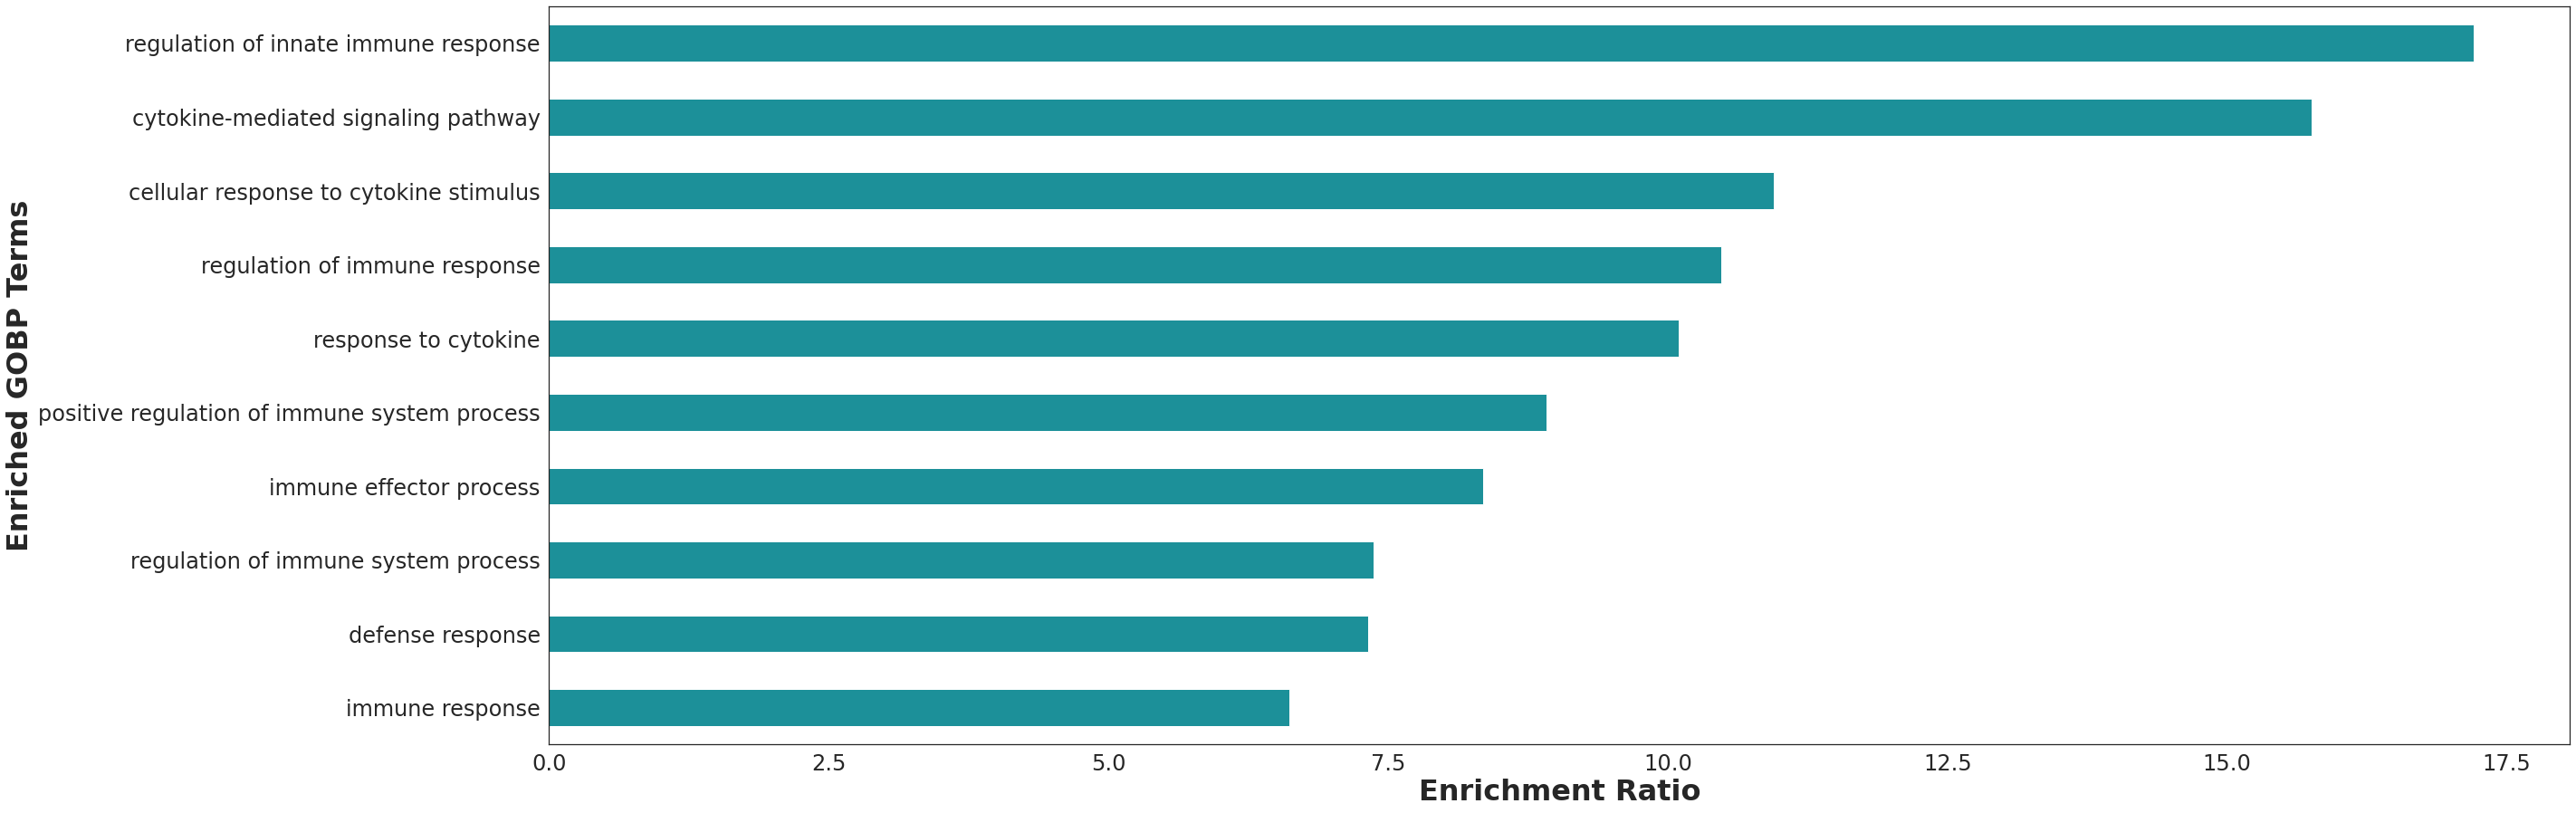

In [ ]:
# plot WebGestalt enrichment results

# set seaborn plot parameters
sns.set_theme(style='white')

# make horizontal bar plot
ax = wg_edges.plot.barh(x='description', y='enrichmentRatio', fontsize=24,
                        figsize=(40,15), legend=False, color=cool)

# label axes
ax.set_xlabel('Enrichment Ratio', fontsize=32, weight='bold')
ax.set_ylabel('Enriched GOBP Terms', fontsize=32, weight='bold')

# save and show figure
plt.savefig('2C_ORA_GOBP_Edges.svg')
plt.show()

## Validation (Figure 5)

In [ ]:
# upload WebGestalt enrichment results text file
from google.colab import files
uploaded = files.upload()

In [ ]:
input = 'WG-KEGG_CCN1high_TCGA-LN229'

# make dataframe from WebGestalt enrichment results
webgestalt = pd.read_csv(input + '.txt',
                         sep='\t', header=0) # tab seperated values
webgestalt

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
0,hsa04650,Natural killer cell mediated cytotoxicity,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,131,10,0.738688,13.537516,1.781042e-09,5.806198e-07,3383;3683;3689;3932;3937;5336;5777;6464;6850;7409,SYK;ITGB2;VAV1;ICAM1;ITGAL;PLCG2;LCP2;PTPN6;LC...
1,hsa04670,Leukocyte transendothelial migration,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,112,9,0.631550,14.250653,8.193601e-09,9.110084e-07,3383;3683;3684;3689;4478;4688;5336;7409;7430,ITGB2;MSN;EZR;VAV1;ICAM1;ITGAM;ITGAL;PLCG2;NCF2
2,hsa05169,Epstein-Barr virus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,201,11,1.133407,9.705254,8.383513e-09,9.110084e-07,23586;3383;3665;3683;4067;4615;5336;6772;6850;...,SYK;STAT1;MYD88;CD19;ICAM1;ITGAL;PLCG2;LYN;CD3...
3,hsa05162,Measles,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,132,9,0.744327,12.091463,3.491658e-08,2.845702e-06,23586;3560;3561;3665;4478;4615;6772;6777;916,IL2RB;STAT1;MYD88;MSN;IL2RG;CD3E;DDX58;IRF7;ST...
4,hsa04662,B cell receptor signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,71,7,0.400358,17.484370,1.081201e-07,7.049431e-06,4067;5336;5777;6850;7409;8519;930,SYK;CD19;VAV1;PLCG2;LYN;PTPN6;IFITM1
5,hsa04064,NF-kappa B signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,95,7,0.535690,13.067266,8.137730e-07,4.421500e-05,23586;3383;3932;4067;4615;5336;6850,SYK;MYD88;ICAM1;PLCG2;LYN;LCK;DDX58
6,hsa05166,Human T-cell leukemia virus 1 infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,255,10,1.437904,6.954567,1.013229e-06,4.718754e-05,3383;3560;3561;3600;3601;3683;3689;3932;6777;916,IL15;IL15RA;ITGB2;IL2RB;ICAM1;ITGAL;IL2RG;LCK;...
7,hsa04810,Regulation of actin cytoskeleton,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,213,9,1.201073,7.493301,2.081004e-06,8.480091e-05,1956;2335;3683;3684;3689;4478;4627;7409;7430,ITGB2;MSN;EZR;VAV1;ITGAM;ITGAL;FN1;MYH9;EGFR
8,hsa04630,JAK-STAT signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,162,8,0.913492,8.757603,2.611399e-06,9.459068e-05,1956;3560;3561;3600;3601;5777;6772;6777,IL15;IL15RA;IL2RB;STAT1;PTPN6;IL2RG;STAT5B;EGFR
9,hsa05140,Leishmaniasis,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,74,6,0.417274,14.379038,3.068705e-06,1.000398e-04,3684;3689;4615;4688;5777;6772,ITGB2;STAT1;MYD88;ITGAM;PTPN6;NCF2


In [ ]:
# define 0 pValue and FDR
webgestalt = webgestalt.replace(0, 1e-16)
webgestalt

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId
0,hsa04650,Natural killer cell mediated cytotoxicity,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,131,10,0.738688,13.537516,1.781042e-09,5.806198e-07,3383;3683;3689;3932;3937;5336;5777;6464;6850;7409,SYK;ITGB2;VAV1;ICAM1;ITGAL;PLCG2;LCP2;PTPN6;LC...
1,hsa04670,Leukocyte transendothelial migration,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,112,9,0.631550,14.250653,8.193601e-09,9.110084e-07,3383;3683;3684;3689;4478;4688;5336;7409;7430,ITGB2;MSN;EZR;VAV1;ICAM1;ITGAM;ITGAL;PLCG2;NCF2
2,hsa05169,Epstein-Barr virus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,201,11,1.133407,9.705254,8.383513e-09,9.110084e-07,23586;3383;3665;3683;4067;4615;5336;6772;6850;...,SYK;STAT1;MYD88;CD19;ICAM1;ITGAL;PLCG2;LYN;CD3...
3,hsa05162,Measles,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,132,9,0.744327,12.091463,3.491658e-08,2.845702e-06,23586;3560;3561;3665;4478;4615;6772;6777;916,IL2RB;STAT1;MYD88;MSN;IL2RG;CD3E;DDX58;IRF7;ST...
4,hsa04662,B cell receptor signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,71,7,0.400358,17.484370,1.081201e-07,7.049431e-06,4067;5336;5777;6850;7409;8519;930,SYK;CD19;VAV1;PLCG2;LYN;PTPN6;IFITM1
5,hsa04064,NF-kappa B signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,95,7,0.535690,13.067266,8.137730e-07,4.421500e-05,23586;3383;3932;4067;4615;5336;6850,SYK;MYD88;ICAM1;PLCG2;LYN;LCK;DDX58
6,hsa05166,Human T-cell leukemia virus 1 infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,255,10,1.437904,6.954567,1.013229e-06,4.718754e-05,3383;3560;3561;3600;3601;3683;3689;3932;6777;916,IL15;IL15RA;ITGB2;IL2RB;ICAM1;ITGAL;IL2RG;LCK;...
7,hsa04810,Regulation of actin cytoskeleton,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,213,9,1.201073,7.493301,2.081004e-06,8.480091e-05,1956;2335;3683;3684;3689;4478;4627;7409;7430,ITGB2;MSN;EZR;VAV1;ITGAM;ITGAL;FN1;MYH9;EGFR
8,hsa04630,JAK-STAT signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,162,8,0.913492,8.757603,2.611399e-06,9.459068e-05,1956;3560;3561;3600;3601;5777;6772;6777,IL15;IL15RA;IL2RB;STAT1;PTPN6;IL2RG;STAT5B;EGFR
9,hsa05140,Leishmaniasis,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,74,6,0.417274,14.379038,3.068705e-06,1.000398e-04,3684;3689;4615;4688;5777;6772,ITGB2;STAT1;MYD88;ITGAM;PTPN6;NCF2


In [ ]:
# calculate -log10(FDR) and log2(enrichmentRatio)
webgestalt['-log10FDR'] = -np.log10(webgestalt['FDR'])
webgestalt['log2ER'] = np.log2(webgestalt['enrichmentRatio'])
webgestalt = webgestalt.sort_values(by=['enrichmentRatio'],
                                    ascending=True) # sort by enrichmentRatio
webgestalt

,geneSet,description,link,size,overlap,expect,enrichmentRatio,pValue,FDR,overlapId,userId,-log10FDR,log2ER
6,hsa05166,Human T-cell leukemia virus 1 infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,255,10,1.437904,6.954567,1.013229e-06,4.718754e-05,3383;3560;3561;3600;3601;3683;3689;3932;6777;916,IL15;IL15RA;ITGB2;IL2RB;ICAM1;ITGAL;IL2RG;LCK;...,4.326173,2.797961
7,hsa04810,Regulation of actin cytoskeleton,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,213,9,1.201073,7.493301,2.081004e-06,8.480091e-05,1956;2335;3683;3684;3689;4478;4627;7409;7430,ITGB2;MSN;EZR;VAV1;ITGAM;ITGAL;FN1;MYH9;EGFR,4.071599,2.905601
8,hsa04630,JAK-STAT signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,162,8,0.913492,8.757603,2.611399e-06,9.459068e-05,1956;3560;3561;3600;3601;5777;6772;6777,IL15;IL15RA;IL2RB;STAT1;PTPN6;IL2RG;STAT5B;EGFR,4.024152,3.130536
2,hsa05169,Epstein-Barr virus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,201,11,1.133407,9.705254,8.383513e-09,9.110084e-07,23586;3383;3665;3683;4067;4615;5336;6772;6850;...,SYK;STAT1;MYD88;CD19;ICAM1;ITGAL;PLCG2;LYN;CD3...,6.040478,3.278766
3,hsa05162,Measles,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,132,9,0.744327,12.091463,3.491658e-08,2.845702e-06,23586;3560;3561;3665;4478;4615;6772;6777;916,IL2RB;STAT1;MYD88;MSN;IL2RG;CD3E;DDX58;IRF7;ST...,5.545811,3.595917
5,hsa04064,NF-kappa B signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,95,7,0.535690,13.067266,8.137730e-07,4.421500e-05,23586;3383;3932;4067;4615;5336;6850,SYK;MYD88;ICAM1;PLCG2;LYN;LCK;DDX58,4.354430,3.707885
0,hsa04650,Natural killer cell mediated cytotoxicity,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,131,10,0.738688,13.537516,1.781042e-09,5.806198e-07,3383;3683;3689;3932;3937;5336;5777;6464;6850;7409,SYK;ITGB2;VAV1;ICAM1;ITGAL;PLCG2;LCP2;PTPN6;LC...,6.236108,3.758891
1,hsa04670,Leukocyte transendothelial migration,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,112,9,0.631550,14.250653,8.193601e-09,9.110084e-07,3383;3683;3684;3689;4478;4688;5336;7409;7430,ITGB2;MSN;EZR;VAV1;ICAM1;ITGAM;ITGAL;PLCG2;NCF2,6.040478,3.832956
9,hsa05140,Leishmaniasis,http://www.kegg.jp/kegg-bin/show_pathway?hsa05...,74,6,0.417274,14.379038,3.068705e-06,1.000398e-04,3684;3689;4615;4688;5777;6772,ITGB2;STAT1;MYD88;ITGAM;PTPN6;NCF2,3.999827,3.845895
4,hsa04662,B cell receptor signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04...,71,7,0.400358,17.484370,1.081201e-07,7.049431e-06,4067;5336;5777;6850;7409;8519;930,SYK;CD19;VAV1;PLCG2;LYN;PTPN6;IFITM1,5.151846,4.127994


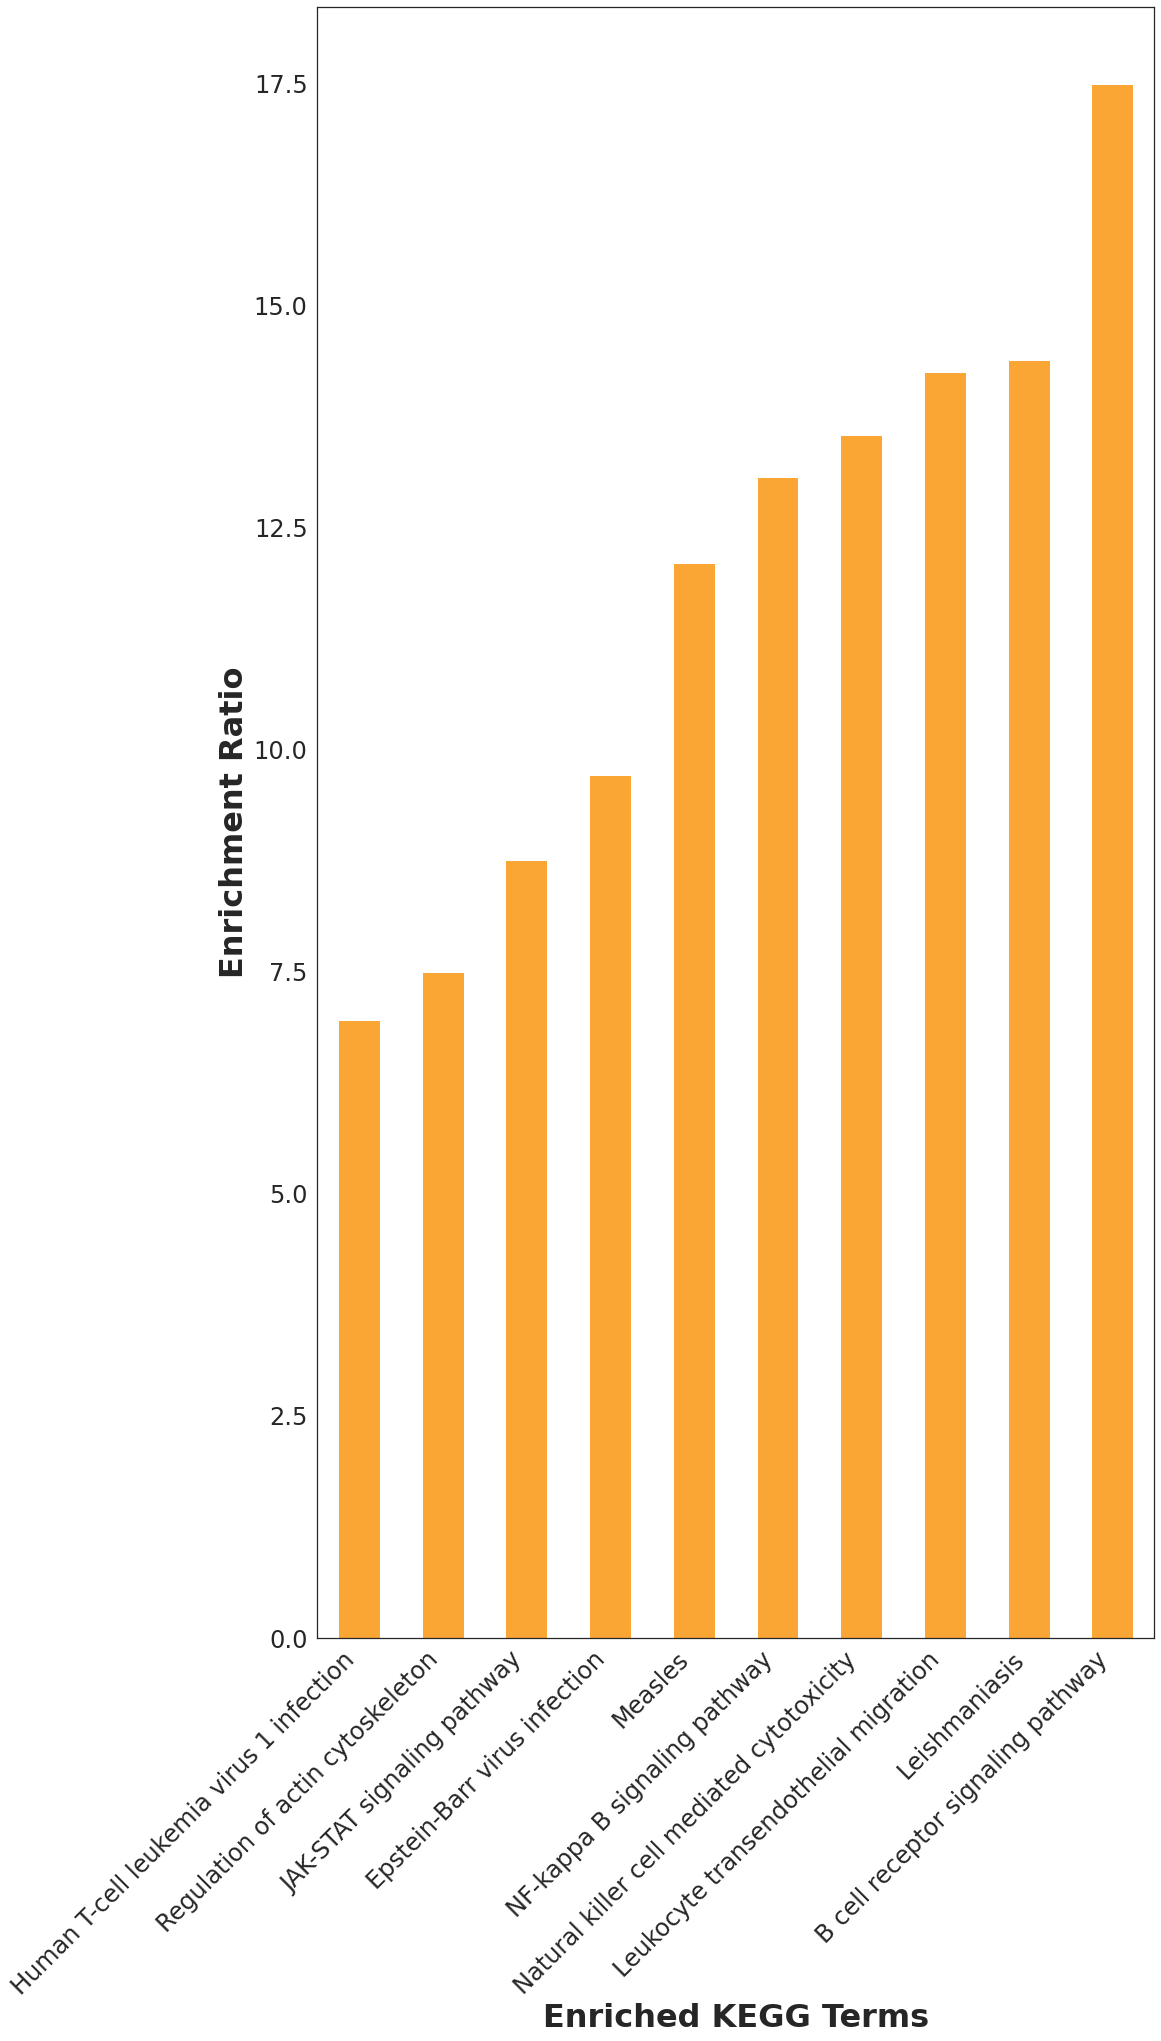

In [ ]:
# plot WebGestalt enrichment results

# set seaborn plot parameters
sns.set_theme(style='white')

# make horizontal bar plot
ax = webgestalt.plot.bar(x='description', y='enrichmentRatio', fontsize=24,
                          figsize=(15,30), legend=False, color=warm)

# label axes
ax.set_xlabel('Enriched KEGG Terms', fontsize=32, weight='bold')
ax.set_ylabel('Enrichment Ratio', fontsize=32, weight='bold')
plt.xticks(rotation = 45, ha = 'right')

# save and show figure
plt.savefig(input + '_bar.svg')
plt.show()

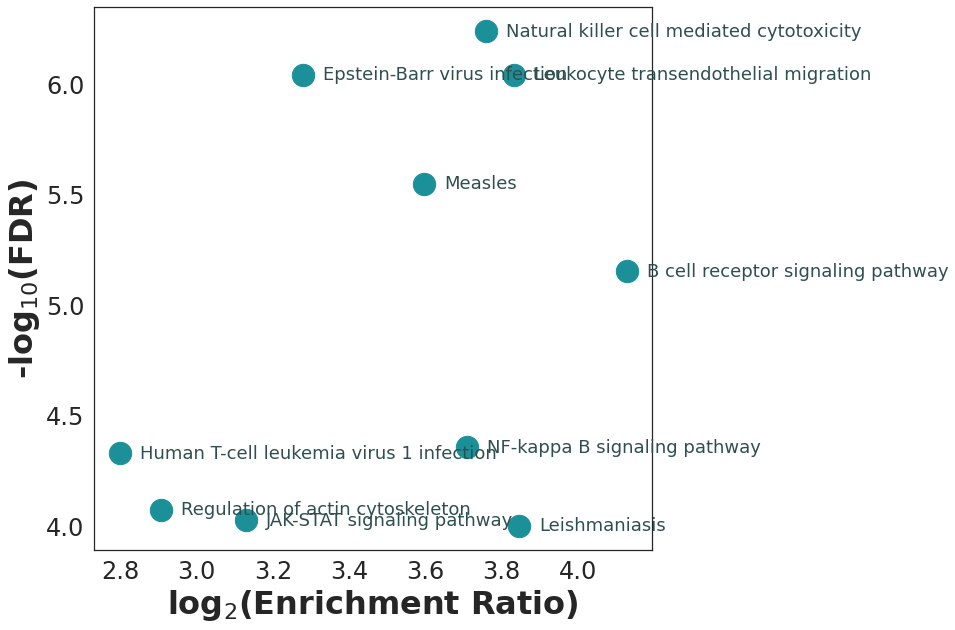

In [ ]:
# set seaborn plot parameters
sns.set_theme(style='white')

# make horizontal bar plot
ax = webgestalt.plot(x='log2ER', y='-log10FDR', kind='scatter', s=500,
                     fontsize=24, figsize=(10,10), legend=False, color=cool)

# label data points
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe/15911372
for row in range(10):
  ax.annotate(webgestalt[['description']].loc[row].values[0],
              webgestalt[['log2ER','-log10FDR']].loc[row].values,
              xytext=(20,-5), 
              textcoords='offset points',
              size=18, 
              color='darkslategrey')

# label axes
ax.set_xlabel('log$_2$(Enrichment Ratio)', fontsize=32, weight='bold')
ax.set_ylabel('-log$_{10}$(FDR)', fontsize=32, weight='bold')

# save and show figure
plt.savefig(input + '_volc.svg')
plt.show()

### Venn

In [4]:
CCLE_CCLE = ['GADD45B','GADD45A','GADD45G','MAPK1','RPS6KA5','MMP14','APBB2',
             'ABL1','NFKBIA','IMPDH1','CSNK2B','STK36','SMARCD3','APBB1',
             'DUSP4','APP','MX1','GFAP','PSEN1','NCSTN','TGFB2','COL4A1',
             'THBS1','ELN','DCN','COL1A2','BGN','APLP2','SYK','PTPN6','FCGR2A',
             'PIK3R1','ABCG5','ACTN1','PRKCA','APLP1','FMOD','ABCG1','UBC',
             'PLCH2','ERBB3','PTK6','FGFR1','RPS6KA3','CDK9','RXRA','COL16A1',
             'ELANE']
CCLE_LN229 = ['TRIM5','TRIM21','IRF7','FADD','MAPK8','MAP3K1','TRAF6','MAPK1',
              'EP300','MAPK9','NFKB1','CTNNB1','ATF7','PRKDC','IFIT5','ISG15',
              'ZC3HAV1','HERC5','CDKN1A','IRF3','DDX58','ATG5','IFIH1','TAB2',
              'UBC','RSAD2','MICA','IDE','HSP90AA1','TICAM2']
TCGA_LN229 = ['IL15','IL15RA','SYK','ITGB2','IL2RB','STAT1','MYD88','MSN',
              'CD19','EZR','HCLS1','VAV1','NFYA','TRIM11','ICAM1','ITGAM',
              'ITGAL','PRKCD','PLCG2','LYN','LCP2','PTPN6','IL2RG','LCK','CD3E',
              'BST2','TLR3','UBC','DDX58','IRF7','NLRC5','PDCD1','CD274',
              'IFITM1','FN1','MYH9','SHC1','TRIM5','UBE2N','STAT5B','EGFR',
              'S100A9','NCF2']

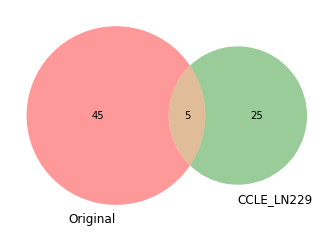

In [13]:
from matplotlib_venn import venn2

# Venn diagrams of NetDecoder with DELTA nodes
# https://python-graph-gallery.com/170-basic-venn-diagram-with-2-groups/
venn2([set(nodes), set(CCLE_LN229)], set_labels = ('Original', 'CCLE_LN229'))
plt.savefig('CCLE_LN229_venn.svg')
plt.show()

In [14]:
# intersection with CCLE (LN229 sources)
list(set(nodes) & set(CCLE_LN229))

['HSP90AA1', 'UBC', 'DDX58', 'IRF7', 'ZC3HAV1']

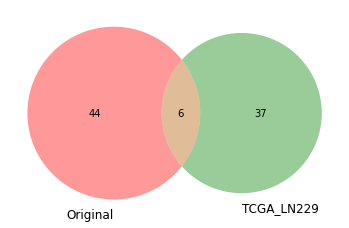

In [15]:
venn2([set(nodes), set(TCGA_LN229)], set_labels = ('Original', 'TCGA_LN229'))
plt.savefig('TCGA_LN229_venn.svg')
plt.show()

In [16]:
# intersection with TCGA (LN229 sources)
list(set(nodes) & set(TCGA_LN229))

['UBC', 'FN1', 'DDX58', 'STAT1', 'LYN', 'IRF7']

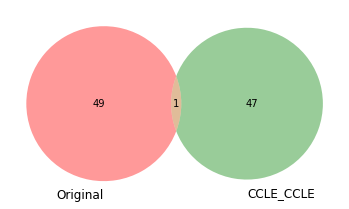

In [17]:
venn2([set(nodes), set(CCLE_CCLE)], set_labels = ('Original', 'CCLE_CCLE'))
plt.savefig('CCLE_CCLE_venn.svg')
plt.show()

In [18]:
# intersection with CCLE (CCLE sources)
list(set(nodes) & set(CCLE_CCLE))

['UBC']

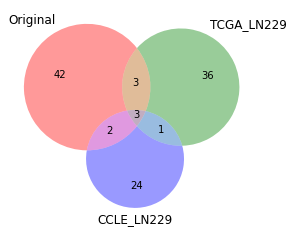

In [19]:
from matplotlib_venn import venn3

venn3([set(nodes), set(TCGA_LN229), set(CCLE_LN229)],
      set_labels = ('Original', 'TCGA_LN229', 'CCLE_LN229'))
plt.savefig('TCGA_CCLE_LN229_venn.svg')
plt.show()

##Full Network Heatmaps

In [7]:
!mkdir csv
!mkdir gml

mkdir: cannot create directory ‘gml’: File exists


In [8]:
import os
import fnmatch

# file locations
gml_path = 'gml'
csv_path = 'csv'

# convert GML files to CSV files
for fileName in os.listdir(gml_path):

    idCheck = "id "
    nameCheck = "name "
    diffsCheck = "diffs "
    totalFlowsCheck = "totalFlows "
    degreeCheck = "degree "
    propsCheck = "props "
    sourceCheck = "source "
    targetCheck = "target "
    weightCheck = "weight "

    # parse GML file
    file = gml_path + "/" + fileName
    inFile = open(file,'r')
    idList = []
    nameList = []
    diffsList = []
    totalFlowsList = []
    degreeList = []
    propsList = []
    sourceList = []
    targetList = []
    weightList = []
    for line in inFile:
        line = line.strip() # strip whitespace
        if(idCheck in line): 
            line = line.replace(idCheck, '')
            idList.append(line)
        elif(nameCheck in line):
            line = line.replace(nameCheck, '')
            line = line.replace('"', '')
            nameList.append(line)
        elif(diffsCheck in line):
            line = line.replace(diffsCheck, '')
            diffsList.append(line)
        elif(totalFlowsCheck in line):
            line = line.replace(totalFlowsCheck, '')
            totalFlowsList.append(line)
        elif(degreeCheck in line):
            line = line.replace(degreeCheck, '')
            degreeList.append(line)
        elif(propsCheck in line):
            line = line.replace(propsCheck, '')
            line = line.replace('"', '')
            propsList.append(line)
        elif(sourceCheck in line):
            line = line.replace(sourceCheck, '')
            sourceList.append(line)
        elif(targetCheck in line):
            line = line.replace(targetCheck, '')
            targetList.append(line)
        elif(weightCheck in line):
            line = line.replace(weightCheck, '')
            weightList.append(line)
    inFile.close()

    # output nodes to CSV file
    outFile = open(csv_path + "/" + fileName + "_nodes.csv", "w")

    # write node headers
    outFile.write(
        "Name" + "," +
        "Diffs" + "," +
        "Total Flow" + "," +
        "Degree" + "," +
        "Props" +
        "\n"
        )

    # write node attributes
    for i in range(len(nameList)):
        outFile.write(
            nameList[i] + "," +
            diffsList[i] + "," +
            totalFlowsList[i] + "," +
            degreeList[i] + "," +
            propsList[i] +
            "\n"
            )

    outFile.close()

    # output edges to seperate CSV file
    outFile = open(csv_path + "/" + fileName + "_edges.csv", "w")

    # write edge headers
    outFile.write(
        "Source" + "," +
        "Target" + "," +
        "Weight" +
        "\n"
        )

    # write edge attributes
    for i in range(len(sourceList)):
        source = int(sourceList[i])
        target = int(targetList[i])
        outFile.write(
            nameList[source] + "," +
            nameList[target] + "," +
            weightList[i] +
            "\n"
            )

    outFile.close()

In [9]:
!ls -al csv

total 312
drwxr-xr-x 2 root root  4096 Apr 21 16:11 .
drwxr-xr-x 1 root root  4096 Apr 21 16:11 ..
-rw-r--r-- 1 root root 28545 Apr 21 16:11 CCLE_LN229_FULL_Disease.gml_edges.csv
-rw-r--r-- 1 root root 27269 Apr 21 16:11 CCLE_LN229_FULL_Disease.gml_nodes.csv
-rw-r--r-- 1 root root 99873 Apr 21 16:11 cyr61pos_FULL_Disease.gml_edges.csv
-rw-r--r-- 1 root root 93468 Apr 21 16:11 cyr61pos_FULL_Disease.gml_nodes.csv
-rw-r--r-- 1 root root 28644 Apr 21 16:11 TCGA_LN229_FULL_Disease.gml_edges.csv
-rw-r--r-- 1 root root 27993 Apr 21 16:11 TCGA_LN229_FULL_Disease.gml_nodes.csv


In [26]:
# make dataframes from CSV files
# normalize total flows as a percent of sum
LN229_LN229_FULL = pd.read_csv(csv_path + "/" +
                               "cyr61pos_FULL_Disease.gml_nodes.csv", sep=",")
LN229_LN229_FULL["Normalized Flow"] = LN229_LN229_FULL["Total Flow"] / LN229_LN229_FULL.sum()["Total Flow"] * 100
print("LN229 total nodes =", LN229_LN229_FULL.shape[0])

CCLE_LN229_FULL = pd.read_csv(csv_path + "/" +
                               "CCLE_LN229_FULL_Disease.gml_nodes.csv", sep=",")
CCLE_LN229_FULL["Normalized Flow"] = CCLE_LN229_FULL["Total Flow"] / CCLE_LN229_FULL.sum()["Total Flow"] * 100
print("CCLE total nodes =", CCLE_LN229_FULL.shape[0])

TCGA_LN229_FULL = pd.read_csv(csv_path + "/" +
                               "TCGA_LN229_FULL_Disease.gml_nodes.csv", sep=",")
TCGA_LN229_FULL["Normalized Flow"] = TCGA_LN229_FULL["Total Flow"] / TCGA_LN229_FULL.sum()["Total Flow"] * 100
print("TCGA total nodes =", TCGA_LN229_FULL.shape[0])

# hsa05168 is HSV-1 KEGG Pathway
KEGG_HSV1 = pd.read_csv("hsa05168.csv", sep=",")
print("KEGG HSV1 pathway genes =", KEGG_HSV1.shape[0])

LN229 total nodes = 1846
CCLE total nodes = 528
TCGA total nodes = 540
KEGG HSV1 pathway genes = 498


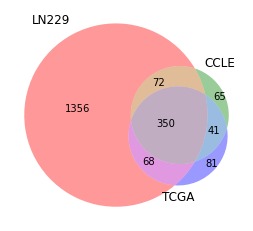

In [23]:
# 3-way Venn diagram
venn3([set(list(LN229_LN229_FULL["Name"])),
       set(list(CCLE_LN229_FULL["Name"])),
       set(list(TCGA_LN229_FULL["Name"]))],
      set_labels = ('LN229', 'CCLE', 'TCGA'))
plt.savefig('FULL_venn3.svg')
plt.show()

In [24]:
!pip install venn

  Created wheel for venn: filename=venn-0.1.3-cp37-none-any.whl size=19701 sha256=fcabbb6ac7eb13a8a219cb463b4c1db31b127f14d6205fa9ec04a8c82c648d88
  Stored in directory: /root/.cache/pip/wheels/41/e4/83/4269e8fb3c81b09363ebe355c373b14b0b947394d2af541734
Successfully built venn


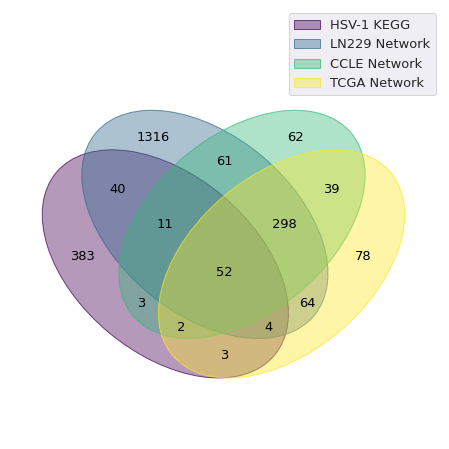

In [102]:
# 4-way Venn diagram
# https://github.com/LankyCyril/pyvenn/blob/master/pyvenn-demo.ipynb
from venn import venn

network_dict = {
    "HSV-1 KEGG": set(list(KEGG_HSV1["x"])),
    "LN229 Network": set(list(LN229_LN229_FULL["Name"])),
    "CCLE Network": set(list(CCLE_LN229_FULL["Name"])),
    "TCGA Network": set(list(TCGA_LN229_FULL["Name"]))
}
venn(network_dict)
plt.savefig('5E_Venn4.svg')
plt.show()

In [39]:
# make list of 4-way intersection
common = list(set(list(KEGG_HSV1["x"])) & set(list(LN229_LN229_FULL["Name"])) & set(list(CCLE_LN229_FULL["Name"])) & set(list(TCGA_LN229_FULL["Name"])))
len(common)

52

In [40]:
# list for WebGestalt input
print('\n'.join(common))

NFKB1
AKT1
IRF9
TP53
IRAK1
BIRC2
MYD88
CHUK
TRAF6
BIRC3
CASP3
BST2
MAP3K7
SRPK1
TYK2
PIK3R1
STAT2
IL6
FADD
DAXX
PML
NFKBIA
TICAM1
IRF7
TBK1
IFNGR1
OAS3
EIF2AK2
RELA
TRADD
TNFRSF1A
STAT1
TAB2
TLR3
OAS2
TAB1
IFNAR2
PTPN11
SP100
HCFC1
IRF3
SYK
SRC
DDX58
TRAF3
JAK1
IFIH1
IKBKB
MAVS
BCL2
IFNAR1
JAK2


In [49]:
LN229_common = LN229_LN229_FULL.loc[LN229_LN229_FULL['Name'].isin(common)].sort_values('Name')
CCLE_common = CCLE_LN229_FULL.loc[CCLE_LN229_FULL['Name'].isin(common)].sort_values('Name')
TCGA_common = TCGA_LN229_FULL.loc[TCGA_LN229_FULL['Name'].isin(common)].sort_values('Name')

In [105]:
common_hmap = np.transpose([list(LN229_common['Normalized Flow']),
                            list(CCLE_common['Normalized Flow']),
                            list(TCGA_common['Normalized Flow'])])
common_hmap_df = pd.DataFrame(common_hmap, columns = ['LN229','CCLE','TCGA'],
                              index = list(LN229_common['Name']))
common_hmap_df

,LN229,CCLE,TCGA
AKT1,0.061846,0.077533,0.107926
BCL2,0.067774,0.223051,0.176565
BIRC2,0.065417,1.097324,0.993774
BIRC3,0.012606,0.293544,0.229734
BST2,0.180126,0.299170,0.541922
CASP3,0.030617,0.089104,0.006172
CHUK,0.074202,0.125351,0.151906
DAXX,0.026457,0.145533,0.072674
DDX58,0.728563,1.929588,1.598666
EIF2AK2,0.065327,0.097623,0.628416


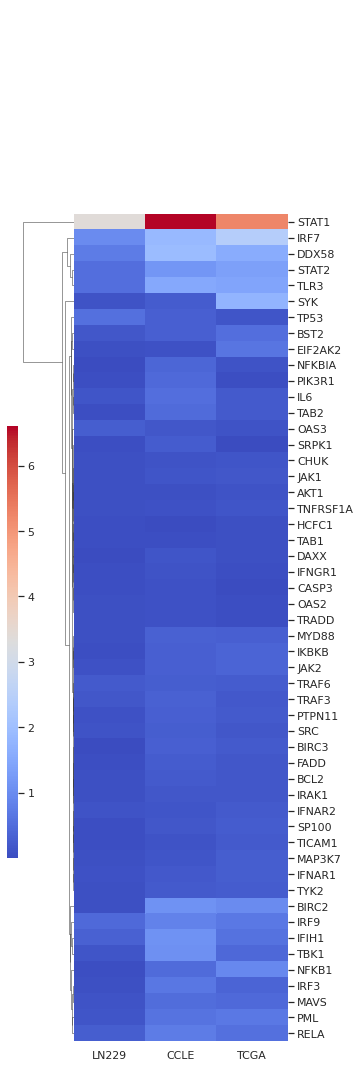

In [108]:
# https://seaborn.pydata.org/generated/seaborn.clustermap.html
ax = sns.clustermap(common_hmap_df, col_cluster=False, figsize=(5,15),
                    cbar_pos=(0, .2, .03, .4), cmap="coolwarm")

# save and show figure
plt.savefig('5F_Clustermap.svg')
plt.show()

In [60]:
# make list of 4-way intersection
common_net = list(set(list(LN229_LN229_FULL["Name"])) & set(list(CCLE_LN229_FULL["Name"])) & set(list(TCGA_LN229_FULL["Name"])))
len(common_net)

350

In [103]:
LN229_common_net = LN229_LN229_FULL.loc[LN229_LN229_FULL['Name'].isin(common_net)].sort_values('Name')
CCLE_common_net = CCLE_LN229_FULL.loc[CCLE_LN229_FULL['Name'].isin(common_net)].sort_values('Name')
TCGA_common_net = TCGA_LN229_FULL.loc[TCGA_LN229_FULL['Name'].isin(common_net)].sort_values('Name')

In [104]:
common_net_hmap = np.transpose([list(LN229_common_net['Normalized Flow']),
                                list(CCLE_common_net['Normalized Flow']),
                                list(TCGA_common_net['Normalized Flow'])])
common_net_hmap_df = pd.DataFrame(common_net_hmap, columns = ['LN229','CCLE','TCGA'],
                                  index = list(LN229_common_net['Name']))
common_net_hmap_df

,LN229,CCLE,TCGA
AAAS,0.000002,0.096738,0.018723
ABL1,0.101679,0.243081,0.186341
ACTB,0.049654,0.011728,0.006922
ACTN1,0.084038,0.061253,0.124661
ACTN4,0.065718,0.164448,0.110839
...,...,...,...
YAP1,0.017942,0.000957,0.034431
YBX1,0.208337,0.201655,0.071057
YWHAB,0.122536,0.112720,0.076248
ZBTB16,0.086724,0.128936,0.041854


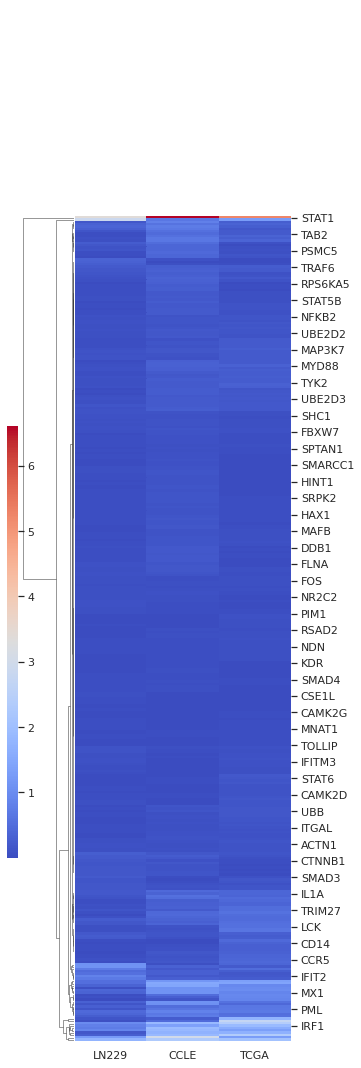

In [109]:
ax = sns.clustermap(common_net_hmap_df, col_cluster=False, figsize=(5,15),
                    cbar_pos=(0, .2, .03, .4), cmap="coolwarm")

# save and show figure
plt.savefig('common_net_cluster.svg')
plt.show()